Utilizaremos el módulo urllib para rastrear la página web:

In [2]:
import urllib.request
response = urllib.request.urlopen('https://jsonplaceholder.typicode.com/posts')
html = response.read()
print (html)

b'[\n  {\n    "userId": 1,\n    "id": 1,\n    "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",\n    "body": "quia et suscipit\\nsuscipit recusandae consequuntur expedita et cum\\nreprehenderit molestiae ut ut quas totam\\nnostrum rerum est autem sunt rem eveniet architecto"\n  },\n  {\n    "userId": 1,\n    "id": 2,\n    "title": "qui est esse",\n    "body": "est rerum tempore vitae\\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\\nqui aperiam non debitis possimus qui neque nisi nulla"\n  },\n  {\n    "userId": 1,\n    "id": 3,\n    "title": "ea molestias quasi exercitationem repellat qui ipsa sit aut",\n    "body": "et iusto sed quo iure\\nvoluptatem occaecati omnis eligendi aut ad\\nvoluptatem doloribus vel accusantium quis pariatur\\nmolestiae porro eius odio et labore et velit aut"\n  },\n  {\n    "userId": 1,\n    "id": 4,\n    "title": "eum et est occaecati",

Como puedes ver en la salida impresa, el resultado contiene muchas etiquetas HTML que deben limpiarse.
Podemos usar BeautifulSoup para limpiar el texto capturado de esta manera:

In [3]:
from bs4 import BeautifulSoup
import urllib.request
response = urllib.request.urlopen('https://jsonplaceholder.typicode.com/posts')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
print (text)

[
  {
    "userId": 1,
    "id": 1,
    "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",
    "body": "quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto"
  },
  {
    "userId": 1,
    "id": 2,
    "title": "qui est esse",
    "body": "est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla"
  },
  {
    "userId": 1,
    "id": 3,
    "title": "ea molestias quasi exercitationem repellat qui ipsa sit aut",
    "body": "et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut"
  },
  {
    "userId": 1,
    "id": 4,
    "title": "eum et est occaecati",
    "body": "ullam et saepe reic

Ahora tenemos el texto limpio de la página web rastreada. 
Finalmente, convirtamos ese texto en tokens dividiendo el texto de esta manera:

In [4]:
from bs4 import BeautifulSoup
 
import urllib.request
 
response = urllib.request.urlopen('https://jsonplaceholder.typicode.com/posts')
 
html = response.read()
 
soup = BeautifulSoup(html,"html5lib")
 
text = soup.get_text(strip=True)
 
tokens = [t for t in text.split()]
 
print (tokens)

['[', '{', '"userId":', '1,', '"id":', '1,', '"title":', '"sunt', 'aut', 'facere', 'repellat', 'provident', 'occaecati', 'excepturi', 'optio', 'reprehenderit",', '"body":', '"quia', 'et', 'suscipit\\nsuscipit', 'recusandae', 'consequuntur', 'expedita', 'et', 'cum\\nreprehenderit', 'molestiae', 'ut', 'ut', 'quas', 'totam\\nnostrum', 'rerum', 'est', 'autem', 'sunt', 'rem', 'eveniet', 'architecto"', '},', '{', '"userId":', '1,', '"id":', '2,', '"title":', '"qui', 'est', 'esse",', '"body":', '"est', 'rerum', 'tempore', 'vitae\\nsequi', 'sint', 'nihil', 'reprehenderit', 'dolor', 'beatae', 'ea', 'dolores', 'neque\\nfugiat', 'blanditiis', 'voluptate', 'porro', 'vel', 'nihil', 'molestiae', 'ut', 'reiciendis\\nqui', 'aperiam', 'non', 'debitis', 'possimus', 'qui', 'neque', 'nisi', 'nulla"', '},', '{', '"userId":', '1,', '"id":', '3,', '"title":', '"ea', 'molestias', 'quasi', 'exercitationem', 'repellat', 'qui', 'ipsa', 'sit', 'aut",', '"body":', '"et', 'iusto', 'sed', 'quo', 'iure\\nvoluptatem',

Contar la frecuencia de palabras:
Calculemos la distribución de frecuencia de esos tokens usando Python NLTK.
Hay una función en NLTK llamada FreqDist() hace el trabajo:
Si buscas el resultado, verás que el token más frecuente es PHP.

In [5]:
from bs4 import BeautifulSoup
 
import urllib.request
 
import nltk
 
response = urllib.request.urlopen('https://jsonplaceholder.typicode.com/posts')
 
html = response.read()
 
soup = BeautifulSoup(html,"html5lib")
 
text = soup.get_text(strip=True)
 
tokens = [t for t in text.split()]
 
freq = nltk.FreqDist(tokens)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

[:1
{:100
"userId"::100
1,:11
"id"::100
"title"::100
"sunt:3
aut:56
facere:9
repellat:9
provident:16
occaecati:10
excepturi:10
optio:4
reprehenderit",:1
"body"::100
"quia:1
et:108
suscipit\nsuscipit:1
recusandae:10
consequuntur:9
expedita:11
cum\nreprehenderit:1
molestiae:24
ut:50
quas:10
totam\nnostrum:1
rerum:28
est:35
autem:15
sunt:17
rem:9
eveniet:8
architecto":1
},:99
2,:11
"qui:7
esse",:1
"est:4
tempore:5
vitae\nsequi:1
sint:20
nihil:14
reprehenderit:8
dolor:15
beatae:7
ea:23
dolores:14
neque\nfugiat:1
blanditiis:9
voluptate:11
porro:9
vel:19
reiciendis\nqui:1
aperiam:11
non:28
debitis:8
possimus:12
qui:48
neque:8
nisi:7
nulla":2
3,:11
"ea:2
molestias:8
quasi:4
exercitationem:8
ipsa:4
sit:20
aut",:2
"et:4
iusto:9
sed:25
quo:26
iure\nvoluptatem:1
omnis:24
eligendi:9
ad\nvoluptatem:1
doloribus:13
accusantium:7
quis:22
pariatur\nmolestiae:1
eius:7
odio:7
labore:4
velit:15
aut":6
4,:11
"eum:3
occaecati",:1
"ullam:3
saepe:8
reiciendis:8
voluptatem:22
adipisci\nsit:1
amet:15
assumenda:

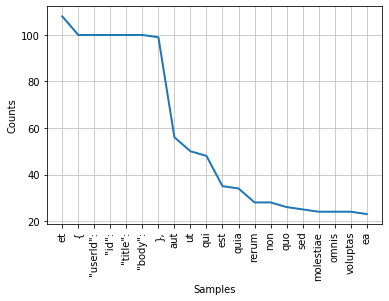

In [7]:
freq.plot(20, cumulative=False)